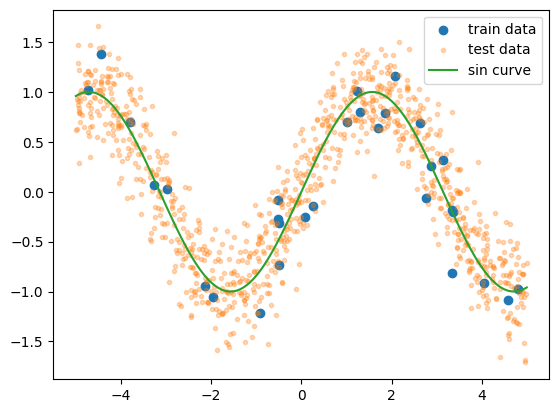

In [128]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import scipy.optimize as optimize

np.random.seed(40)


# generate data like sin curve
def generate_data(n, sigma):
    x = np.random.uniform(-5, 5, n)
    y = np.sin(x) + np.random.normal(0, sigma, n)
    return x, y


train_data = generate_data(30, 0.3)
test_data = generate_data(1000, 0.3)
plt.scatter(train_data[0], train_data[1], c='tab:blue', label='train data')
plt.scatter(test_data[0], test_data[1], marker=".", c='tab:orange', label='test data', alpha=0.3)


xx = np.linspace(-5, 5, 100000)
yy = np.sin(xx)
plt.plot(xx, yy, c='tab:green', label='sin curve')
plt.legend()
plt.show()

In [2]:
degree = 6

poly = PolynomialFeatures(degree)
train_x_poly = poly.fit_transform(train_data[0].reshape(-1, 1))
train_y = train_data[1]

train_x_poly.shape

(15, 7)

train mse: 4873689710.260236


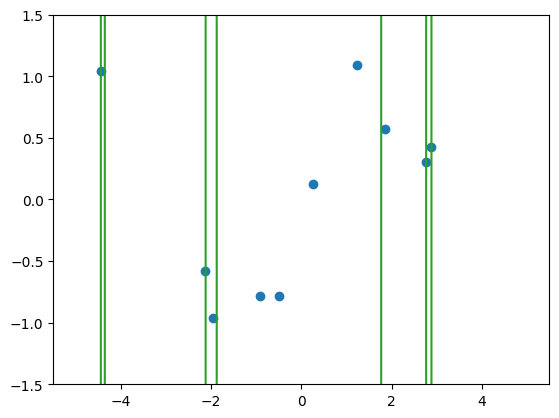

In [124]:
alpla = 1000000
degree = 100

poly = PolynomialFeatures(degree)
train_x_poly = poly.fit_transform(train_data[0].reshape(-1, 1))
train_x_poly = train_x_poly
train_y = train_data[1]

mat = train_x_poly.T @ train_x_poly + alpla * np.eye(degree + 1)
mat_inv = np.linalg.inv(mat)
w = mat_inv @ train_x_poly.T @ train_y

xx_poly = poly.fit_transform(xx.reshape(-1, 1))
yy_pred = xx_poly @ w

fig, ax = plt.subplots()
ax.scatter(train_data[0], train_data[1], c='tab:blue', label='train data')
ax.plot(xx, yy_pred, c='tab:green', label='sin curve')
ax.set_ylim(-1.5, 1.5)

train_y_pred = train_x_poly @ w
train_mse = mean_squared_error(train_y, train_y_pred)
print(f'train mse: {train_mse}')

In [92]:
train_x_poly.dtype

dtype('float64')

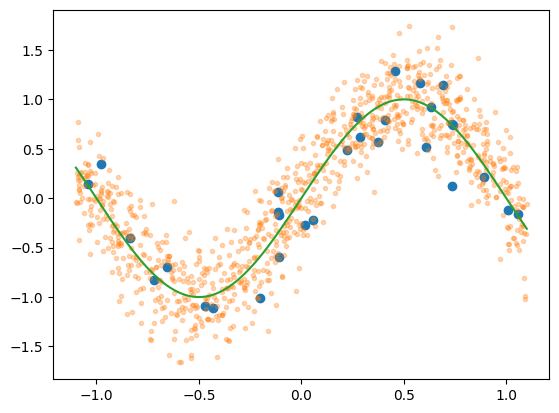

In [195]:
# MLP

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(40)
torch.manual_seed(40)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=True)
        self.fc_ = nn.Linear(hidden_size, hidden_size, bias=True)
        self.fc2 = nn.Linear(hidden_size, output_size, bias=True)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc_(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x


RANGE = 1.1

def generate_data(n, sigma):
    x = np.random.uniform(-RANGE, RANGE, n)
    y = np.sin(np.pi * x) + np.random.normal(0, sigma, n)
    return x, y

train_data = generate_data(30, 0.3)
test_data = generate_data(1000, 0.3)

plt.scatter(train_data[0], train_data[1], c='tab:blue', label='train data')
plt.scatter(test_data[0], test_data[1], marker=".", c='tab:orange', label='test data', alpha=0.3)

xx = np.linspace(-RANGE, RANGE, 1000)
yy = np.sin(np.pi * xx)
plt.plot(xx, yy, c='tab:green', label='sin curve')

In [198]:
degree = 30
poly = PolynomialFeatures(degree=degree)
train_x_poly = poly.fit_transform(train_data[0].reshape(-1, 1))
test_x_poly = poly.fit_transform(test_data[0].reshape(-1, 1))

train_x = torch.from_numpy(train_x_poly).float()
train_y = torch.from_numpy(train_data[1].reshape(-1, 1)).float()
test_x = torch.from_numpy(test_x_poly).float()
test_y = torch.from_numpy(test_data[1].reshape(-1, 1)).float()

model = MLP(degree+1, degree ** 2, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

loss_list = []
for epoch in range(100000):
    optimizer.zero_grad()
    output = model(train_x)
    loss = criterion(output, train_y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

    if (epoch+1) % 1000 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item()}')

    # if epoch > 5000 and (np.mean(loss_list[-500:-100]) - np.mean(loss_list[-100:])) < 1e-30:
    #     break

print(f'epoch: {epoch+1}, loss: {loss.item()}')

epoch: 1000, loss: 0.039545465260744095
epoch: 2000, loss: 0.02094958908855915
epoch: 3000, loss: 0.017116814851760864
epoch: 4000, loss: 0.015784410759806633
epoch: 5000, loss: 0.014754773117601871
epoch: 6000, loss: 0.014142768457531929
epoch: 7000, loss: 0.013706090860068798
epoch: 8000, loss: 0.013360952958464622
epoch: 9000, loss: 0.01303978729993105
epoch: 10000, loss: 0.0126917390152812
epoch: 11000, loss: 0.012331780046224594
epoch: 12000, loss: 0.012493731454014778
epoch: 13000, loss: 0.011556954123079777
epoch: 14000, loss: 0.011295279487967491
epoch: 15000, loss: 0.010726877488195896
epoch: 16000, loss: 0.010293509811162949
epoch: 17000, loss: 0.009715120308101177
epoch: 18000, loss: 0.009317385964095592
epoch: 19000, loss: 0.008925717324018478
epoch: 20000, loss: 0.008608998730778694
epoch: 21000, loss: 0.008335531689226627
epoch: 22000, loss: 0.00818598736077547
epoch: 23000, loss: 0.008155989460647106
epoch: 24000, loss: 0.008161593228578568


KeyboardInterrupt: 

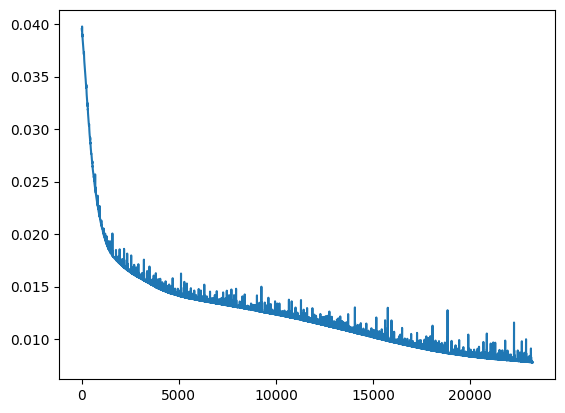

In [199]:
plt.plot(loss_list[1000:])

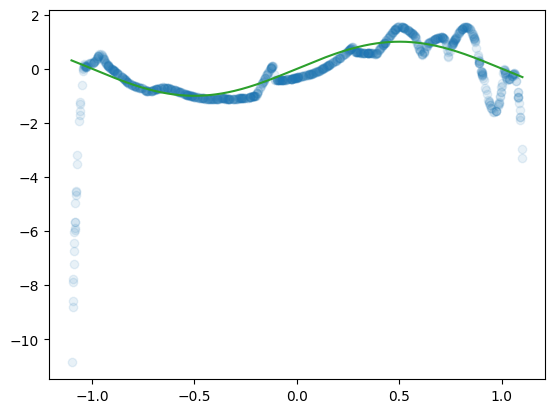

In [205]:
output = model(train_x)
output_test = model(test_x)

# plt.plot(train_data[0], train_data[1], 'o', alpha=0.1)
# plt.plot(train_data[0], output.detach().numpy(), 'o', alpha=0.1)

# plt.plot(test_data[0], test_data[1], 'o', alpha=0.1)
plt.plot(test_data[0], output_test.detach().numpy(), 'o', alpha=0.1)
plt.plot(xx, yy, c='tab:green', label='sin curve')

In [206]:
degree = 50
poly = PolynomialFeatures(degree=degree)
train_x_poly = poly.fit_transform(train_data[0].reshape(-1, 1))
test_x_poly = poly.fit_transform(test_data[0].reshape(-1, 1))

train_x = torch.from_numpy(train_x_poly).float()
train_y = torch.from_numpy(train_data[1].reshape(-1, 1)).float()
test_x = torch.from_numpy(test_x_poly).float()
test_y = torch.from_numpy(test_data[1].reshape(-1, 1)).float()

model = MLP(degree+1, degree ** 2, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

loss_list = []
for epoch in range(100000):
    optimizer.zero_grad()
    output = model(train_x)
    loss = criterion(output, train_y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

    if (epoch+1) % 1000 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item()}')

    # if epoch > 5000 and (np.mean(loss_list[-500:-100]) - np.mean(loss_list[-100:])) < 1e-30:
    #     break

print(f'epoch: {epoch+1}, loss: {loss.item()}')

epoch: 1000, loss: 0.029000377282500267
epoch: 2000, loss: 0.02040243335068226
epoch: 3000, loss: 0.015948940068483353
epoch: 4000, loss: 0.015966571867465973
epoch: 5000, loss: 0.013569949194788933
epoch: 6000, loss: 0.012448042631149292
epoch: 7000, loss: 0.011502450332045555
epoch: 8000, loss: 0.010289037600159645
epoch: 9000, loss: 0.009437819942831993
epoch: 10000, loss: 0.0095962043851614
epoch: 11000, loss: 0.008699284866452217
epoch: 12000, loss: 0.008362796157598495
epoch: 13000, loss: 0.008308649994432926
epoch: 14000, loss: 0.00833551213145256


KeyboardInterrupt: 

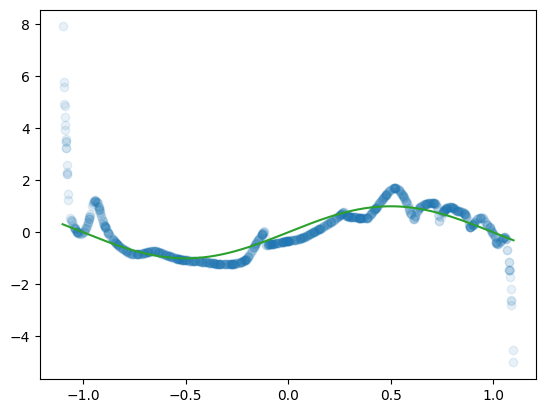

In [207]:
output = model(train_x)
output_test = model(test_x)

# plt.plot(train_data[0], train_data[1], 'o', alpha=0.1)
# plt.plot(train_data[0], output.detach().numpy(), 'o', alpha=0.1)

# plt.plot(test_data[0], test_data[1], 'o', alpha=0.1)
plt.plot(test_data[0], output_test.detach().numpy(), 'o', alpha=0.1)
plt.plot(xx, yy, c='tab:green', label='sin curve')

In [148]:
degree = 15
poly = PolynomialFeatures(degree=degree)
train_x_poly = poly.fit_transform(train_data[0].reshape(-1, 1))
test_x_poly = poly.fit_transform(test_data[0].reshape(-1, 1))

train_x = torch.from_numpy(train_x_poly).float()
train_y = torch.from_numpy(train_data[1].reshape(-1, 1)).float()
test_x = torch.from_numpy(test_x_poly).float()
test_y = torch.from_numpy(test_data[1].reshape(-1, 1)).float()

model = MLP(degree+1, 100, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

loss_list = []
for epoch in range(100000):
    optimizer.zero_grad()
    output = model(train_x)
    loss = criterion(output, train_y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    if (epoch+1) % 1000 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item()}')

    if epoch > 500 and (loss_list[-100] - loss.item()) < 1e-10:
        break

epoch: 1000, loss: 0.30245158076286316
epoch: 2000, loss: 0.15972760319709778
epoch: 3000, loss: 0.1235603392124176
epoch: 4000, loss: 0.10916654020547867
epoch: 5000, loss: 0.10136344283819199
epoch: 6000, loss: 0.09702012687921524
epoch: 7000, loss: 0.09454634040594101
epoch: 8000, loss: 0.09291494637727737
epoch: 9000, loss: 0.09170945733785629
epoch: 10000, loss: 0.09061498939990997
epoch: 11000, loss: 0.08956623822450638


KeyboardInterrupt: 

In [155]:
degree = 30
poly = PolynomialFeatures(degree=degree)
train_x_poly = poly.fit_transform(train_data[0].reshape(-1, 1))
test_x_poly = poly.fit_transform(test_data[0].reshape(-1, 1))

train_x = torch.from_numpy(train_x_poly).float()
train_y = torch.from_numpy(train_data[1].reshape(-1, 1)).float()
test_x = torch.from_numpy(test_x_poly).float()
test_y = torch.from_numpy(test_data[1].reshape(-1, 1)).float()

model = MLP(degree+1, 1000, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

loss_list = []
for epoch in range(100000):
    optimizer.zero_grad()
    output = model(train_x)
    loss = criterion(output, train_y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    if (epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item()}')

    if epoch > 500 and (loss_list[-100] - loss.item()) < 1e-30:
        break

print(loss_list[-1])

epoch: 100, loss: 0.21493062376976013
epoch: 200, loss: 0.12671039998531342
epoch: 300, loss: 0.10065530240535736
epoch: 400, loss: 0.09260101616382599
epoch: 500, loss: 0.08835304528474808
epoch: 600, loss: 0.08533722907304764
epoch: 700, loss: 0.08299114555120468
epoch: 800, loss: 0.08106610178947449
epoch: 900, loss: 0.07942477613687515
epoch: 1000, loss: 0.07797879725694656
epoch: 1100, loss: 0.07669509202241898
epoch: 1200, loss: 0.07555470615625381
epoch: 1300, loss: 0.07451736927032471
epoch: 1400, loss: 0.07354550063610077
epoch: 1500, loss: 0.07264461368322372
epoch: 1600, loss: 0.07181526720523834
epoch: 1700, loss: 0.07102854549884796
epoch: 1800, loss: 0.07030181586742401
epoch: 1900, loss: 0.06962037831544876
epoch: 2000, loss: 0.06898465007543564
epoch: 2100, loss: 0.06838328391313553
epoch: 2200, loss: 0.06783907115459442
epoch: 2300, loss: 0.06731892377138138
epoch: 2400, loss: 0.06685491651296616
epoch: 2500, loss: 0.0664345920085907
epoch: 2600, loss: 0.06604348123073

In [157]:
degree = 30
poly = PolynomialFeatures(degree=degree)
train_x_poly = poly.fit_transform(train_data[0].reshape(-1, 1))
test_x_poly = poly.fit_transform(test_data[0].reshape(-1, 1))

train_x = torch.from_numpy(train_x_poly).float()
train_y = torch.from_numpy(train_data[1].reshape(-1, 1)).float()
test_x = torch.from_numpy(test_x_poly).float()
test_y = torch.from_numpy(test_data[1].reshape(-1, 1)).float()

model = MLP(degree+1, 100, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-6)

loss_list = []
for epoch in range(100000):
    optimizer.zero_grad()
    output = model(train_x)
    loss = criterion(output, train_y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    if (epoch+1) % 1000 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item()}')

    if epoch > 500 and (loss_list[-100] - loss.item()) < 1e-30:
        break

print(loss_list[-1])

epoch: 1000, loss: 0.5004875659942627
epoch: 2000, loss: 0.47966352105140686
epoch: 3000, loss: 0.45921799540519714
epoch: 4000, loss: 0.43877550959587097
epoch: 5000, loss: 0.41806572675704956
epoch: 6000, loss: 0.3975140154361725
epoch: 7000, loss: 0.3774774968624115
epoch: 8000, loss: 0.358180433511734
epoch: 9000, loss: 0.3391360640525818
epoch: 10000, loss: 0.32031676173210144
epoch: 11000, loss: 0.3021816909313202
epoch: 12000, loss: 0.2846600413322449
epoch: 13000, loss: 0.2677888870239258
epoch: 14000, loss: 0.25192949175834656
epoch: 15000, loss: 0.23709578812122345
epoch: 16000, loss: 0.2231040596961975
epoch: 17000, loss: 0.20989564061164856
epoch: 18000, loss: 0.19714824855327606
epoch: 19000, loss: 0.18493428826332092
epoch: 20000, loss: 0.17333050072193146
epoch: 21000, loss: 0.16236858069896698
epoch: 22000, loss: 0.15209417045116425
epoch: 23000, loss: 0.14261406660079956
epoch: 24000, loss: 0.13395586609840393
epoch: 25000, loss: 0.12612518668174744
epoch: 26000, loss:

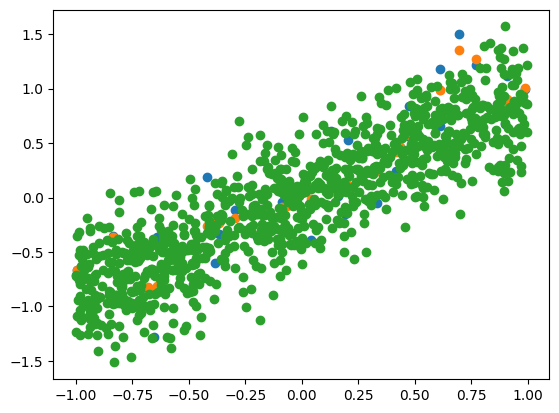

In [160]:
output = model(train_x)

plt.plot(train_data[0], train_data[1], 'o')
plt.plot(train_data[0], output.detach().numpy(), 'o')

plt.plot(test_data[0], test_data[1], 'o')